<a href="https://colab.research.google.com/github/nadavschwalb/image_processing/blob/main/Copy_of_Lab2_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Lab 2 – Basic Image Processing Techniques and Color Spaces
 

**Import the necessary libraries for Lab 2:**

In [ ]:
%matplotlib inline 
import numpy as np
import cv2
import math
import matplotlib.pylab as plt
from skimage import transform,io
from sklearn import cluster
from sklearn.utils import shuffle
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Load the image of your choise as **gray scale** image (replace lenna).

/content/drive/.shortcut-targets-by-id/1v9OpRtyz-wDF8ankyi5-Z5prTKKvv1il/image_processing/Lab_2
Image shape:(714, 1024, 3), Image data type:uint8


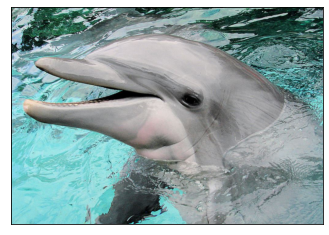

In [ ]:
%cd '/content/drive/My Drive/image_processing/Lab_2'
img = io.imread('dolphin.bmp')


print ('Image shape:{}, Image data type:{}'.format(img.shape,img.dtype))
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X & Y axis
plt.show()

**Follow the instractions in each section:**

### Part 1 – Basic Image Processing Techniques
___

**Resizing (Scaling) and Rotation**

__Note__: In this experiment the same scaling factor is applied twice - in  vertical and in horizontal directions.  
* Resize your image by two scaling factors: **½ and 2**, using **nearest neighbor and bilinear** interpolation methods (4 outputs in total). Use _resize_ or _rescale_ from _skimage.transform_ library.
* Plot the four outputs with the relevant title for each. you can zoom on detailed area to make the differences more visible if needed (i.g. takeing 100x100 size part by *numpy slicing*).
* Observe the differences between the 2 interpolation methods and explain the results. 

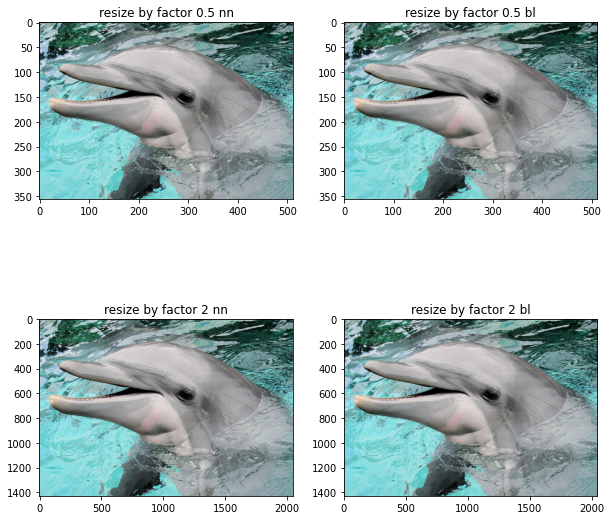

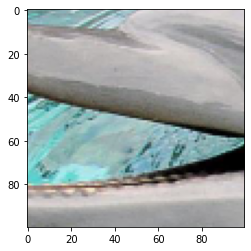

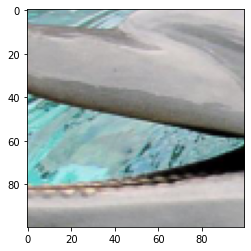

In [ ]:
# Insert your code:
img1 = transform.rescale(img, 0.5, order=0, multichannel=True)
img2 = transform.rescale(img, 0.5, order=1, multichannel=True)
img3 = transform.rescale(img, 2, order=0, multichannel=True)
img4 = transform.rescale(img, 2, order=1, multichannel=True)

plt.figure(1,figsize=(10,10))
plt.subplot(221)
plt.title("resize by factor 0.5 nn")
plt.imshow(img1)


plt.subplot(222)
plt.imshow(img2)
plt.title("resize by factor 0.5 bl")


plt.subplot(223)
plt.imshow(img3)
plt.title("resize by factor 2 nn")


plt.subplot(224)
plt.imshow(img4)
plt.title("resize by factor 2 bl")
plt.show()

zoom1 = img1[78:178, 78:178]
zoom2 = img2[78:178:, 78:178]
plt.imshow(zoom1)
plt.show()
plt.imshow(zoom2)
plt.show()

We can see that the bilinear interpolation produced much better results than the nearest neighbor, as we expected. We see that the image after resizing by factor of 0.5 is much sharper than the image got after resizing by factor of 2.

* Resize your image by scaling factor  **¼** using bilinear interpolation – **once with the default filter and once without a filter**.    
    In order to disable the default filter set the parameter 'anti_aliasing' to false.    
    Show the two output images.
    
    Explain the problem discussed in Part 1, Question 2 of the Preliminary Report: refer to both images (with and without the filter) to demonstrate the problem and its solution.

Text(0.5, 1.0, 'resize by factor 0.25 with anti-aliasing filter')

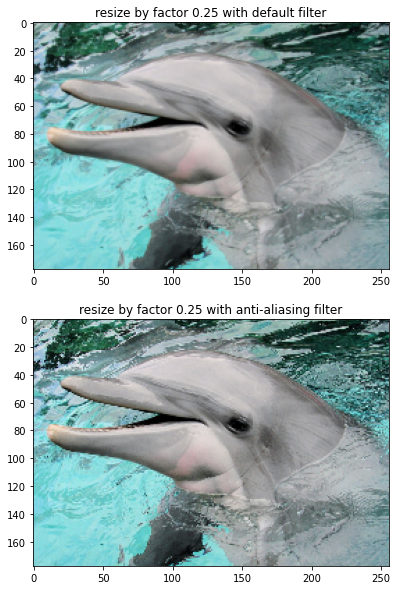

In [ ]:
# Insert your code:
img_default = transform.rescale(img, 0.25, order=1, multichannel=True)
img_biliner = transform.rescale(img, 0.25, order=1, multichannel=True, anti_aliasing=False)
plt.figure(1,figsize=(10,10))
plt.subplot(211)
plt.title("resize by factor 0.25 with default filter")
plt.imshow(img_default)


plt.subplot(212)
plt.imshow(img_biliner)
plt.title("resize by factor 0.25 with anti-aliasing filter")

* Use the supplied functiom *resize_im(img, scale, order)* which shrinks and then expands the image by the same factor. Apply this program on the image of your choice with scaling factors of **2, 4, 8, 16, 32** and for each scaling factor calculate the Root Mean Square error (RMS) - the calculation given in the main pdf file.  
    Perform the same process for both interpolation methods - **nearest neighbor and bilinear**. Plot the RMS error vs. the scaling factor for both interpolation methods (on the same plot) and explain the plot. Attach several image examples that support your graph plot.

In [ ]:
def resize_im(image, scale, method):
    m,n = img.shape
    img_shrink = transform.rescale(img, 1.0/scale , order=method, multichannel=True)
    return transform.resize(img_shrink, (m,n), order=method)

In [ ]:
# Insert your code:
img_2_0=resize_im(img,scale=2,method=0) # scaling by factor of 2 with interpolation of order 0
rms_2_0=np.sqrt(((np.power(img_2_0-img,2)).sum())/714*1024)

img_2_1=resize_im(img,scale=2,method=1) # scaling by factor of 2 with interpolation of order 1
rms_2_1=np.sqrt(((np.power(img_2_1-img,2)).sum())/714*1024)

img_4_0=resize_im(img,4,0) # scaling by factor of 4 with interpolation of order 0
rms_4_0=np.sqrt(((np.power(img_4_0-img,2)).sum())/714*1024)

img_4_1=resize_im(img,4,1) # scaling by factor of 4 with interpolation of order 1
rms_4_1=np.sqrt(((np.power(img_4_1-img,2)).sum())/714*1024)

img_8_0=resize_im(img,8,0) # scaling by factor of 8 with interpolation of order 0
rms_8_0=np.sqrt(((np.power(img_8_0-img,2)).sum())/714*1024)

# img_8_1=resize_im(img,8,1 # scaling by factor of 8 with interpolation of order 0
# rms_8_1=np.sqrt(((np.power(img_8_1-img,2)).sum())/714*1024)

img_16_0=resize_im(img,16,0) # scaling by factor of 16 with interpolation of order 0
rms_16_0=np.sqrt(((np.power(img_16_0-img,2)).sum())/714*1024)

img_16_1=resize_im(img,16,1) # scaling by factor of 16 with interpolation of order 1
rms_16_1=np.sqrt(((np.power(img_16_1-img,2)).sum())/714*1024)

img_32_0=resize_im(img,32,0) # scaling by factor of 32 with interpolation of order 0
rms_32_0=np.sqrt(((np.power(img_32_0-img,2)).sum())/714*1024)

img_32_1=resize_im(img,32,1) # scaling by factor of 32 with interpolation of order 1
rms_32_1=np.sqrt(((np.power(img_32_1-img,2)).sum())/714*1024)



plt.figure(1,figsize=(10,10))
plt.subplot(2101)
plt.title("resize by factor 0.5 nn")
plt.imshow(img_2_0)


plt.subplot(2102)
plt.imshow(img_2_1)
plt.title("resize by factor 0.5 bl")


plt.subplot(2103)
plt.imshow(img_4_0)
plt.title("resize by factor 2 nn")


plt.subplot(2104)
plt.imshow(img_4_1)
plt.title("resize by factor 2 bl")
plt.show()




plt.plot([2,4,8,16,32], [rms_2_0,rms_4_0,rms_8_0,rms_16_1,rms_32_0],[2,4,8,16,32],[rms_2_1,rms_4_1,rms_8_1,rms_16_1,rms_32_1])
plt.show()

ValueError: ignored

Write your answer here

* Apply imrotate function to rotate the image of your choice by **30, 60 and -45 degrees** using **nearest neighbor and bilinear** interpolation methods. Observe the differences between the 2 interpolation methods (you can zoom on detailed area if needed).

In [ ]:
# Insert your code:

Write your answer here


### Part 2 – Color Space Conversion
___

1. Open an image of your choice and show the histograms and images for the R, G, B components. Use the supplied function *plot_RGB(img)*. Note, you should load a color image of your choise (use cv2.imread).

In [ ]:
# Supplied function - 
def plot_RGB(img):
    plt.imshow(img)
    plt.title('Regular image')
    plt.show()

    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
    plt.figure(figsize=(20,15))
    plt.subplot(322)
    plt.imshow(b,cmap='gray')
    plt.title("Blue")
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(324)
    plt.imshow(g,cmap='gray')
    plt.title("Green")
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(326)
    plt.imshow(r,cmap='gray')
    plt.title("Red")
    plt.subplots_adjust(hspace=0.5)

    color = ('b','g','r')
    titles = ("Blue","Green" ,"Red")
    #plt.figure(figsize=(10,8))
    for i,col in enumerate(color):
        histr = cv2.calcHist([img[:,:,i]],[0],None,[256],[0,256])
        plt.subplot(i*2+321)                             # 311 -> plot in the first cell
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        plt.subplots_adjust(hspace=.5)
        plt.title(str(titles[i]))

    plt.show()

In [ ]:
# Insert your code:


* Does the 'Regular image' looks as you expected? if not please explain why. (Hint: what is the color space of the image that plt.imshow gets as input).

* Explain the results in the graphs and in the grayscale images.

Write your answer here

2.	Plot the 'Regular image' in the correct way as you expected  to get (use cv2.cvtColor command).

In [ ]:
# Insert your code:

3.	Convert the image to the HSV color space (use cv2.cvtColor command), and show it with plt.imshow(HSV_image).

In [ ]:
# Insert your code:

4.	Show the images and the histograms of the 3 components in the HSV color space.

In [ ]:
# Insert your code:

* Explain the results in the graphs and in the grayscale images.

Write your answer here